In [52]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
# Define the stock ticker symbol and download historical data
ticker = "TSLA"  # Replace with your desired stock ticker
start_date = "2022-01-01"
end_date = "2023-01-01"
stock_data = yf.download(ticker, start=start_date, end=end_date, progress=False)

# Calculate 30-day and 90-day moving averages and adding them to stock_data dataframe
stock_data['30d MA'] = stock_data['Close'].rolling(window=30).mean()
stock_data['90d MA'] = stock_data['Close'].rolling(window=90).mean()

### Strategy function

In [69]:
# Initialize position and cash
position = 0
cash = 10000
shares = 0
buy_signals = 0
sell_signals = 0

iteration = stock_data.iterrows() 

#The .iterrows() function is used to iterate over the rows of the dataframe one by one

# Apply the trading strategy
for index, row in iteration: # here, index is the Date(index doesn't have a column name). And the loop is essentially going through each row of the stock_data DataFrame, allowing you to access and process the data in each row using the row variable. 
    if row['30d MA'] < row['90d MA'] and position == 0: #(== is used for comparison and = is used for assignment)
        # Buy signal
        shares = cash / row['Close']
        position = 1
        buy_signals += 1 # += is a shorthand operator that performs addition and assignment in a single step. When the line buy_signals += 1 is executed, it increments the value of buy_signals by 1. It's equivalent to writing buy_signals = buy_signals + 1.
    
    elif row['30d MA'] > row['90d MA'] and position == 1:
        # Sell signal
        cash = shares * row['Close']
        position = 0
        shares = 0
        sell_signals += 1

# Calculate final portfolio value
final_portfolio_value = (shares * stock_data.iloc[-1]['Close']) # -1 inside square brackets refers to the last row of the DataFrame


### Display calculation details

In [55]:
# Display calculation details
print(f"Number of Buy Signals: {buy_signals}")
print(f"Number of Sell Signals: {sell_signals}")
print(f"Initial Cash: $10000")
print(f"Final Cash: ${cash:.2f}") #The .2f formatting ensures that the cash value is displayed with two decimal places for a clearer representation of currency.
print(f"Shares Held: {shares:.2f}")
print(f"Final Stock Price: ${stock_data.iloc[-1]['Close']:.2f}")
print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")

Number of Buy Signals: 2
Number of Sell Signals: 1
Initial Cash: $10000
Final Cash: $12184.19
Shares Held: 54.87
Final Stock Price: $123.18
Final Portfolio Value: $6759.36


In [56]:
initial_portfolio_value = 10000
profit = final_portfolio_value - initial_portfolio_value

In [66]:
profit

-3240.639142867318

### Adding buy and sell signals to dataframe for plot

In [65]:
# Create a new column to mark buy and sell signals in the DataFrame

# Calculate if the 30-day moving average is below the 90-day moving average on the current day
is_30d_below_90d = stock_data['30d MA'] < stock_data['90d MA']

# Calculate if the 30-day moving average was above or equal to the 90-day moving average on the previous day
was_30d_above_90d_prev_day = stock_data['30d MA'].shift(1) >= stock_data['90d MA'].shift(1) 

#shift(1) operator gives the previous row's values (each value in the column shifts down by one row)

# Combine the conditions to get the 'Buy Signal' for the current day
stock_data['Buy Signal'] = is_30d_below_90d & was_30d_above_90d_prev_day


# Calculate if the 30-day moving average is above the 90-day moving average on the current day
is_30d_above_90d = stock_data['30d MA'] > stock_data['90d MA']

# Calculate if the 30-day moving average was below or equal to the 90-day moving average on the previous day
was_30d_below_90d_prev_day = stock_data['30d MA'].shift(1) <= stock_data['90d MA'].shift(1)

# Combine the conditions to get the 'Sell Signal' for the current day
stock_data['Sell Signal'] = is_30d_above_90d & was_30d_below_90d_prev_day


### Plotting the data

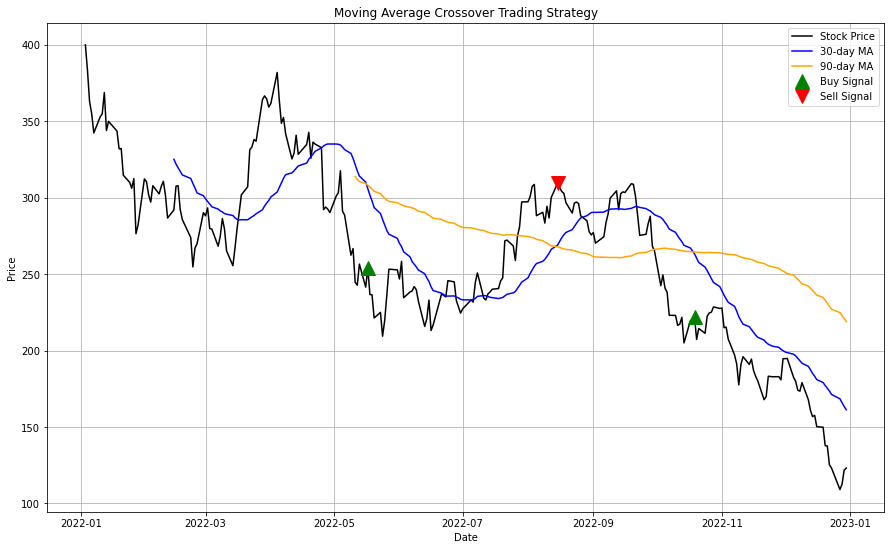

In [67]:

plt.figure(figsize=(15, 9))

# Plotting stock price, 30-day MA, and 90-day MA
plt.plot(stock_data.index, stock_data['Close'], label='Stock Price', color='black')
plt.plot(stock_data.index, stock_data['30d MA'], label='30-day MA', color='blue')
plt.plot(stock_data.index, stock_data['90d MA'], label='90-day MA', color='orange')

# Plotting buy signals
# Select rows where 'Buy Signal' is TRUE
buy_signal_rows = stock_data['Buy Signal']

# Get the corresponding index values of the 'Buy Signal' rows
buy_signal_indices = stock_data.index[buy_signal_rows]

# Get the closing prices for the 'Buy Signal' rows
buy_signal_prices = stock_data['Close'][buy_signal_rows]

# Plot the 'Buy Signal' markers
plt.plot(buy_signal_indices, buy_signal_prices, '^', markersize=14, color='g', label='Buy Signal')

# Plotting sell signals
# Select rows where 'Sell Signal' is TRUE
sell_signal_rows = stock_data['Sell Signal']

# Get the corresponding index values of the 'Sell Signal' rows
sell_signal_indices = stock_data.index[sell_signal_rows]

# Get the closing prices for the 'Sell Signal' rows
sell_signal_prices = stock_data['Close'][sell_signal_rows]

# Plot the 'Sell Signal' markers
plt.plot(sell_signal_indices, sell_signal_prices, 'v', markersize=14, color='r', label='Sell Signal')


plt.title('Moving Average Crossover Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

plt.show()